In [1]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 11.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
df = pd.read_excel("S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [5]:
scaler = MinMaxScaler()

Best hyperparameters

Epoch: 15 | Inputs: 126 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss




# H=1 Forecasts

In [6]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [7]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
61/61 [==============================] - 17s 13ms/step - loss: 0.0788 - accuracy: 5.2056e-04 - mean_absolute_error: 0.2307
Epoch 2/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.0010 - mean_absolute_error: 0.0845
Epoch 3/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 0.0010 - mean_absolute_error: 0.0614
Epoch 4/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0562
Epoch 5/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.0010 - mean_absolute_error: 0.0477
Epoch 6/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0479
Epoch 7/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0455
Epoch 8/15
61/61 [==============================] - 1s 8ms/step - loss: 0.0028 - accu

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/15
61/61 [==============================] - 6s 10ms/step - loss: 0.1482 - accuracy: 0.0010 - mean_absolute_error: 0.3212
Epoch 2/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0139 - accuracy: 0.0010 - mean_absolute_error: 0.1016
Epoch 3/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0093 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0816
Epoch 4/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0634
Epoch 5/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.0010 - mean_absolute_error: 0.0573
Epoch 6/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0540
Epoch 7/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.0010 - mean_absolute_error: 0.0496
Epoch 8/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/15
61/61 [==============================] - 7s 9ms/step - loss: 0.1293 - accuracy: 5.2056e-04 - mean_absolute_error: 0.3179
Epoch 2/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0129 - accuracy: 0.0010 - mean_absolute_error: 0.0966
Epoch 3/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0734
Epoch 4/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0061 - accuracy: 0.0010 - mean_absolute_error: 0.0672
Epoch 5/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0596
Epoch 6/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0564
Epoch 7/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 5.2056e-04 - mean_absolute_error: 0.0525
Epoch 8/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0033 - ac

In [8]:
RMSE

[0.0026616544779886147,
 0.0027340027169880056,
 0.0026561700188708426,
 0.0027614589164521347,
 0.002645735382908795,
 0.0026284299940942265,
 0.0026589736374175066,
 0.0026357295360885614,
 0.0026906741876943593,
 0.002731272540919919,
 0.002705385146532773,
 0.002673044982611987,
 0.0025895307024640895,
 0.0027246580424721213,
 0.002615741334121336]

In [9]:
Accuracy

[60.46762769828619,
 63.9015844023644,
 62.44342165682154,
 56.67685600164552,
 61.31708841191386,
 65.1912090020593,
 61.70627189103497,
 59.75487456410049,
 65.13480857038951,
 64.0027322318758,
 65.46839001428515,
 58.85454042738842,
 61.93989004509437,
 64.58321273984376,
 61.72332842525676]

In [10]:
Quasilikelihood

[0.10676761211578074,
 0.1006362712225775,
 0.10180070059545639,
 0.11948635498931114,
 0.10312874286451663,
 0.0934581840747851,
 0.10250191463732733,
 0.1097804248112666,
 0.09552764150942337,
 0.09908081533342367,
 0.09370811311175446,
 0.11231208475399422,
 0.10048825187818614,
 0.09705245162481427,
 0.09989024239680494]

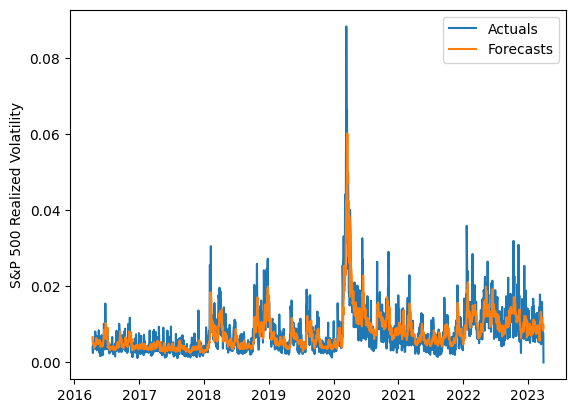

In [11]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [12]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [13]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [14]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
61/61 [==============================] - 6s 9ms/step - loss: 0.1479 - accuracy: 0.3477 - mean_absolute_error: 0.2999
Epoch 2/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0108 - accuracy: 0.3717 - mean_absolute_error: 0.0891
Epoch 3/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.3321 - mean_absolute_error: 0.0710
Epoch 4/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.3201 - mean_absolute_error: 0.0624
Epoch 5/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.3706 - mean_absolute_error: 0.0552
Epoch 6/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.3165 - mean_absolute_error: 0.0499
Epoch 7/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.4341 - mean_absolute_error: 0.0462
Epoch 8/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.4279 - mean

In [15]:
Accuracy

[58.53289696001567,
 37.12620893826798,
 63.21425092797631,
 59.506500578080356,
 56.552402660495616,
 55.059364437739156,
 60.709632666003664,
 60.67817318936544,
 59.35675662690881,
 59.403701057293176,
 60.536624742471766,
 62.73751635670417,
 53.94440075649577,
 61.61029436900045,
 58.09919573589146]

In [16]:
RMSE

[0.002756700666526937,
 0.0036820343839222744,
 0.0028989357650776883,
 0.002783807998814922,
 0.002883082712678524,
 0.0028763772068982675,
 0.00279239324374299,
 0.0028507274060545484,
 0.0028405162003844217,
 0.0028170052204753806,
 0.002842570097911338,
 0.0027504106731221687,
 0.0028943573828547403,
 0.0027969061589606125,
 0.0028576595286053455]

In [17]:
Quasilikelihood

[0.1143991157904079,
 0.2035754824895407,
 0.10498628529508669,
 0.11342980944854177,
 0.12510488768012512,
 0.1296448725004785,
 0.11003075093461037,
 0.11296936258572772,
 0.11471237556574236,
 0.11455692623379878,
 0.11130340593781686,
 0.10185185084534992,
 0.1330905864512919,
 0.1075087209444537,
 0.11788311071711995]

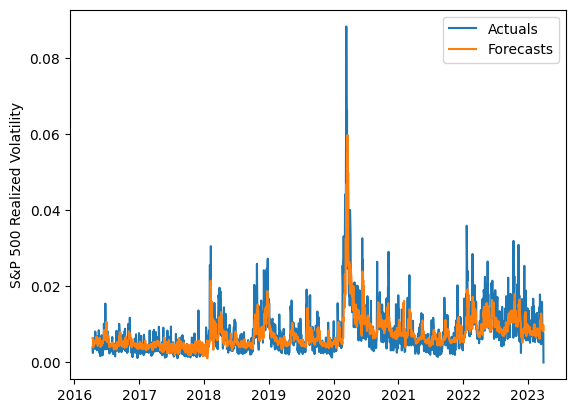

In [18]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [19]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [20]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [21]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
61/61 [==============================] - 7s 10ms/step - loss: 0.1433 - accuracy: 0.1702 - mean_absolute_error: 0.2840
Epoch 2/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.2051 - mean_absolute_error: 0.0825
Epoch 3/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.1801 - mean_absolute_error: 0.0673
Epoch 4/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0048 - accuracy: 0.1957 - mean_absolute_error: 0.0587
Epoch 5/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0045 - accuracy: 0.2296 - mean_absolute_error: 0.0553
Epoch 6/15
61/61 [==============================] - 1s 13ms/step - loss: 0.0035 - accuracy: 0.1530 - mean_absolute_error: 0.0508
Epoch 7/15
61/61 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 0.1666 - mean_absolute_error: 0.0475
Epoch 8/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.1442 

In [22]:
Accuracy

[55.88130504799103,
 56.01123694270078,
 58.779350736616735,
 57.77667960240673,
 54.201634340539506,
 59.01251408336547,
 55.18930440927925,
 56.86551796435779,
 57.490663379612236,
 53.75230321995761,
 56.02602510058156,
 49.63283313010321,
 45.75453157301865,
 55.01116085115467,
 55.66674170885227]

In [23]:
RMSE

[0.0029022519193098325,
 0.0029002819848535284,
 0.0028869281659918895,
 0.0029836786624171286,
 0.0029406969531742067,
 0.002894287980571489,
 0.002922577092194361,
 0.0028965815340095645,
 0.002951530376631293,
 0.002927150788007543,
 0.0029761332516996457,
 0.003032029606842406,
 0.0032633277214071266,
 0.00301349164120675,
 0.0029461955153238318]

In [24]:
Quasilikelihood

[0.12934606803578713,
 0.12952988647402544,
 0.12007827964623657,
 0.12572773312124313,
 0.13410636759662975,
 0.11870493961699238,
 0.1314193255493981,
 0.12506619493425528,
 0.1267469310995552,
 0.13745201872566337,
 0.13077996851957524,
 0.15319737347074341,
 0.16673619446113114,
 0.135163475817727,
 0.13232418093906945]

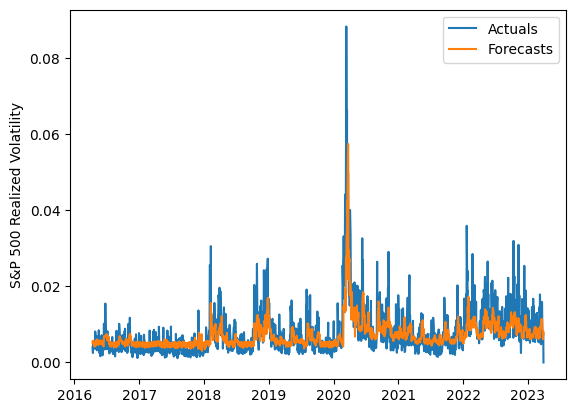

In [25]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [26]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [27]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [28]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  test=test[:len(test)-5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
61/61 [==============================] - 6s 10ms/step - loss: 0.0870 - accuracy: 0.1067 - mean_absolute_error: 0.2162
Epoch 2/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.0635 - mean_absolute_error: 0.0675
Epoch 3/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.0531 - mean_absolute_error: 0.0571
Epoch 4/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.0567 - mean_absolute_error: 0.0513
Epoch 5/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.0422 - mean_absolute_error: 0.0486
Epoch 6/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.0495 - mean_absolute_error: 0.0460
Epoch 7/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.0677 - mean_absolute_error: 0.0433
Epoch 8/15
61/61 [==============================] - 1s 12ms/step - loss: 0.0024 - accuracy: 0.0640 

In [29]:
Accuracy

[54.733451741572736,
 50.06563019965065,
 55.75031741929013,
 41.417692383076286,
 55.90361054148533,
 46.513179326314315,
 50.56385872673898,
 54.383823372967676,
 48.950533072096015,
 48.32665027658949,
 53.54056543300797,
 50.27223941281771,
 50.6929591619224,
 49.24790604720562,
 58.013344550180875]

In [30]:
RMSE

[0.0031550501440623245,
 0.0031891717293929486,
 0.0031091871271272486,
 0.0035789348916868435,
 0.0031344664122218697,
 0.0033294061680440917,
 0.003218723300508792,
 0.0031331213700652046,
 0.0033048269939217464,
 0.003240622267700903,
 0.003192876205540235,
 0.003236961941991682,
 0.0032035663621931094,
 0.003303732738276805,
 0.0030467735451071517]

In [31]:
Quasilikelihood

[0.1403773272044788,
 0.15819697532036525,
 0.13474916436997106,
 0.19122750633587735,
 0.13762295057958923,
 0.17092430536296213,
 0.15598227145503318,
 0.14029446296717382,
 0.16239442227365822,
 0.16449618035926938,
 0.14316488112681228,
 0.1583382629671575,
 0.1552873537596286,
 0.15996738924949178,
 0.12659446501638014]

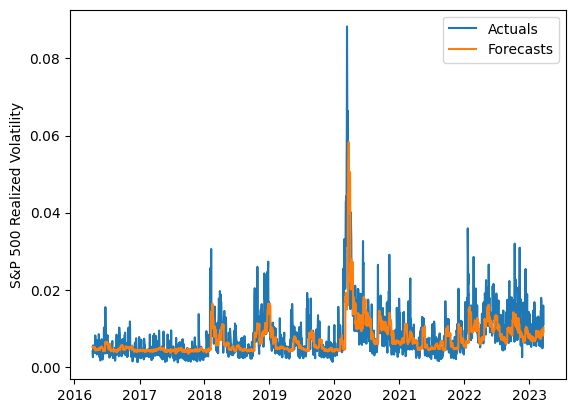

In [32]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions)  
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [33]:
len(test)%22

12

In [34]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [35]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [36]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  test=test[:len(test)-17]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
61/61 [==============================] - 7s 10ms/step - loss: 0.0839 - accuracy: 0.0692 - mean_absolute_error: 0.2098
Epoch 2/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.0292 - mean_absolute_error: 0.0686
Epoch 3/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.0193 - mean_absolute_error: 0.0589
Epoch 4/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 0.0151 - mean_absolute_error: 0.0526
Epoch 5/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.0281 - mean_absolute_error: 0.0495
Epoch 6/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.0265 - mean_absolute_error: 0.0476
Epoch 7/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.0271 - mean_absolute_error: 0.0466
Epoch 8/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.019

3/3 [==============================] - 0s 6ms/step
Epoch 1/15
61/61 [==============================] - 6s 13ms/step - loss: 0.0569 - accuracy: 0.0557 - mean_absolute_error: 0.1834
Epoch 2/15
61/61 [==============================] - 1s 14ms/step - loss: 0.0057 - accuracy: 0.0078 - mean_absolute_error: 0.0652
Epoch 3/15
61/61 [==============================] - 1s 11ms/step - loss: 0.0041 - accuracy: 0.0161 - mean_absolute_error: 0.0543
Epoch 4/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 0.0167 - mean_absolute_error: 0.0501
Epoch 5/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.0167 - mean_absolute_error: 0.0457
Epoch 6/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.0219 - mean_absolute_error: 0.0470
Epoch 7/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.0193 - mean_absolute_error: 0.0432
Epoch 8/15
61/61 [============================

3/3 [==============================] - 0s 4ms/step
Epoch 1/15
61/61 [==============================] - 8s 10ms/step - loss: 0.1071 - accuracy: 0.0698 - mean_absolute_error: 0.2453
Epoch 2/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0100 - accuracy: 0.0682 - mean_absolute_error: 0.0845
Epoch 3/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0065 - accuracy: 0.0411 - mean_absolute_error: 0.0669
Epoch 4/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.0292 - mean_absolute_error: 0.0590
Epoch 5/15
61/61 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.0156 - mean_absolute_error: 0.0545
Epoch 6/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 0.0260 - mean_absolute_error: 0.0508
Epoch 7/15
61/61 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.0224 - mean_absolute_error: 0.0499
Epoch 8/15
61/61 [=============================

In [37]:
Accuracy

[27.946155800600113,
 50.74294299509483,
 39.74954738301742,
 52.758774704833044,
 49.253923386560295,
 47.43794055389873,
 47.390586530963354,
 45.71457549894947,
 43.15881396764516,
 43.91623787507003,
 44.448025147862744,
 51.5581886483295,
 46.12338360279191,
 47.20661720175367,
 44.43588328404393]

In [38]:
RMSE

[0.004536796675380015,
 0.0035031177432549225,
 0.0040448271046569,
 0.0034579976364627913,
 0.0036394072438893444,
 0.0035679035090129185,
 0.0036684610727818648,
 0.0036212716923291863,
 0.003756682545909322,
 0.0037431251000110176,
 0.003604225488595911,
 0.0036026441432622084,
 0.003789846430533451,
 0.003655028704819242,
 0.003749088783955696]

In [39]:
Quasilikelihood

[0.26356047127765514,
 0.16507168253188967,
 0.20870948566533823,
 0.15799263223631124,
 0.17099346172849733,
 0.17649209955609232,
 0.17746286268749528,
 0.1828599641143938,
 0.19385063375854664,
 0.1923051710291446,
 0.19003709274793773,
 0.16257401925247236,
 0.18253345041029975,
 0.17928056593605496,
 0.18814552109211682]

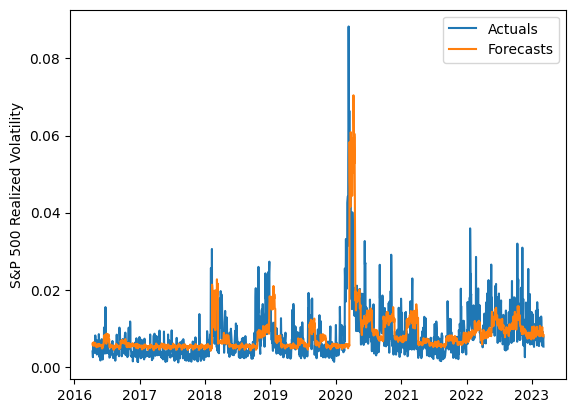

In [40]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions)  
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])